# Let's make this a new visualization notebook

In [1]:
from plotly3d.plot import scatter, trajectories
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler


In [2]:
# Here we retrieve the mean and std vals from the original embeddings
RESULTS_DIR = os.path.join('../../results')
data_name = 'scRNAseq'
SAVE_PATH = os.path.join(RESULTS_DIR, data_name)


trajectoriespts = np.load(os.path.join(SAVE_PATH,'trajectories.npy'))
generated = np.load(os.path.join(SAVE_PATH,'generated.npy'))
normalize = np.load(os.path.join(SAVE_PATH, 'normalize.npz'),allow_pickle=True)
std_vals = normalize['std']
mean_vals = normalize['mean']


true_data = pd.read_csv(os.path.join(SAVE_PATH,'true_data.csv'),index_col=0)
df_samples = pd.read_csv(os.path.join(SAVE_PATH,'df_samples.csv'),index_col=0)

In [5]:
trajectoriespts[0]

array([[-0.0446222 , -0.03202564],
       [-0.03944726, -0.02495227],
       [-0.02894217,  0.0010322 ],
       [-0.02578922,  0.00419723],
       [-0.03007917, -0.00973169],
       [-0.0352827 , -0.01645757],
       [-0.02253734, -0.00233834],
       [-0.04467171, -0.03202167],
       [-0.02932173,  0.00090918],
       [-0.04474818, -0.03177305],
       [-0.02015118,  0.00801598],
       [-0.0223261 ,  0.00724434],
       [-0.02772413,  0.00340642],
       [-0.01814098, -0.01073647],
       [-0.04382721, -0.03072602],
       [-0.04402619, -0.0303499 ],
       [-0.02816511,  0.00209557],
       [-0.02844541,  0.00203555],
       [-0.04292663, -0.03065762],
       [-0.03042801, -0.00165664],
       [-0.0245871 ,  0.00623549],
       [-0.02450315,  0.00544494],
       [-0.04232941, -0.02777747],
       [-0.02504928,  0.00488983],
       [-0.02696638, -0.00026139],
       [-0.02240009,  0.00740043],
       [-0.02970696, -0.00073884],
       [-0.01644497, -0.01096091],
       [-0.04159956,

In [3]:
scaler = MinMaxScaler()
scaler.fit(true_data)
trajectories(
    trajectoriespts,
    fig=scatter(
        true_data.values, 
        df_samples['samples'].values,
        scaler=scaler,
        # rescale=False,
        s=5,
        alpha=1,
    ), 
    scaler=scaler,
    s=1,
    # rescale=False,
    filename=os.path.join(SAVE_PATH, 'trajectories.html'),
    title='',
)

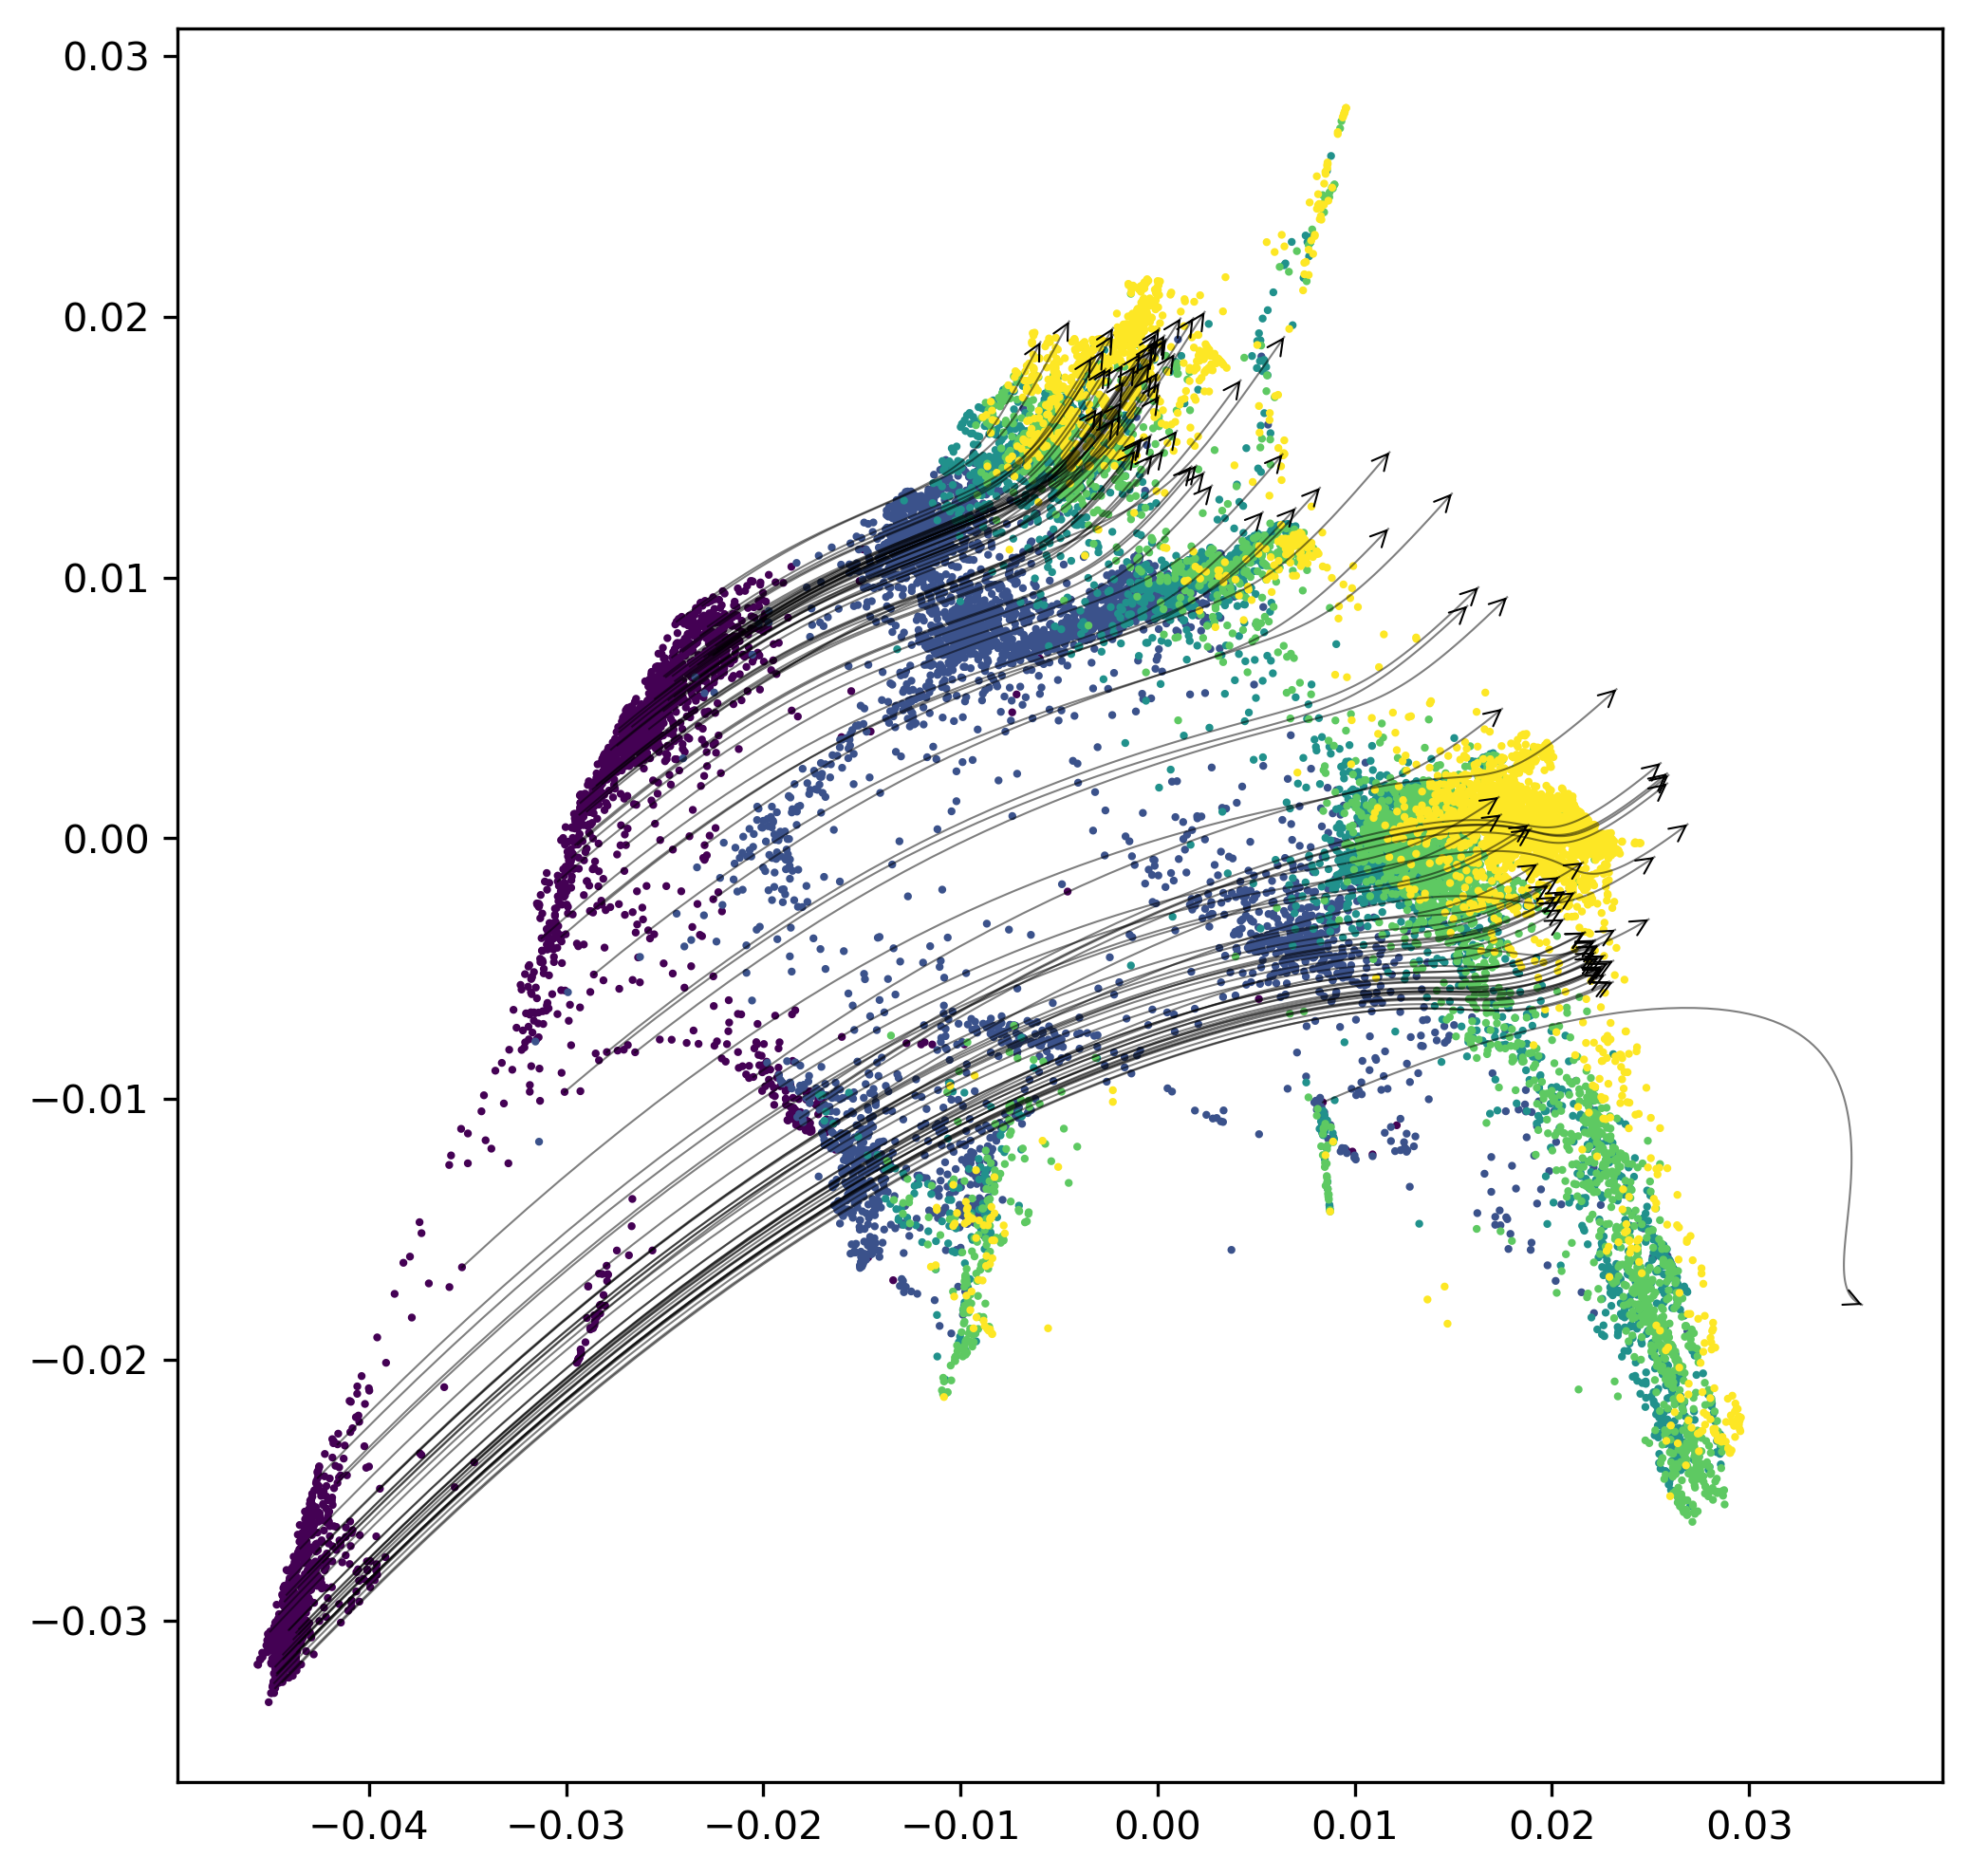

In [5]:
fig = plt.figure(figsize=(8, 8), dpi=300)
plt.scatter(true_data.values[:, 0], true_data.values[:, 1], c=df_samples['samples'].values, cmap='viridis', s=1)
for i,traj in enumerate(np.transpose(trajectoriespts, axes=(1,0,2))):
    # widths = m_traj[:,i]
    plt.plot(traj[:, 0], traj[:, 1], alpha=.5, linewidth=.5, color='Black');
    plt.annotate('', xy=(traj[-1, 0], traj[-1, 1]), xytext=(traj[-2, 0], traj[-2, 1]),
                 arrowprops=dict(arrowstyle='->', color='Black', lw=.5, mutation_scale=10))


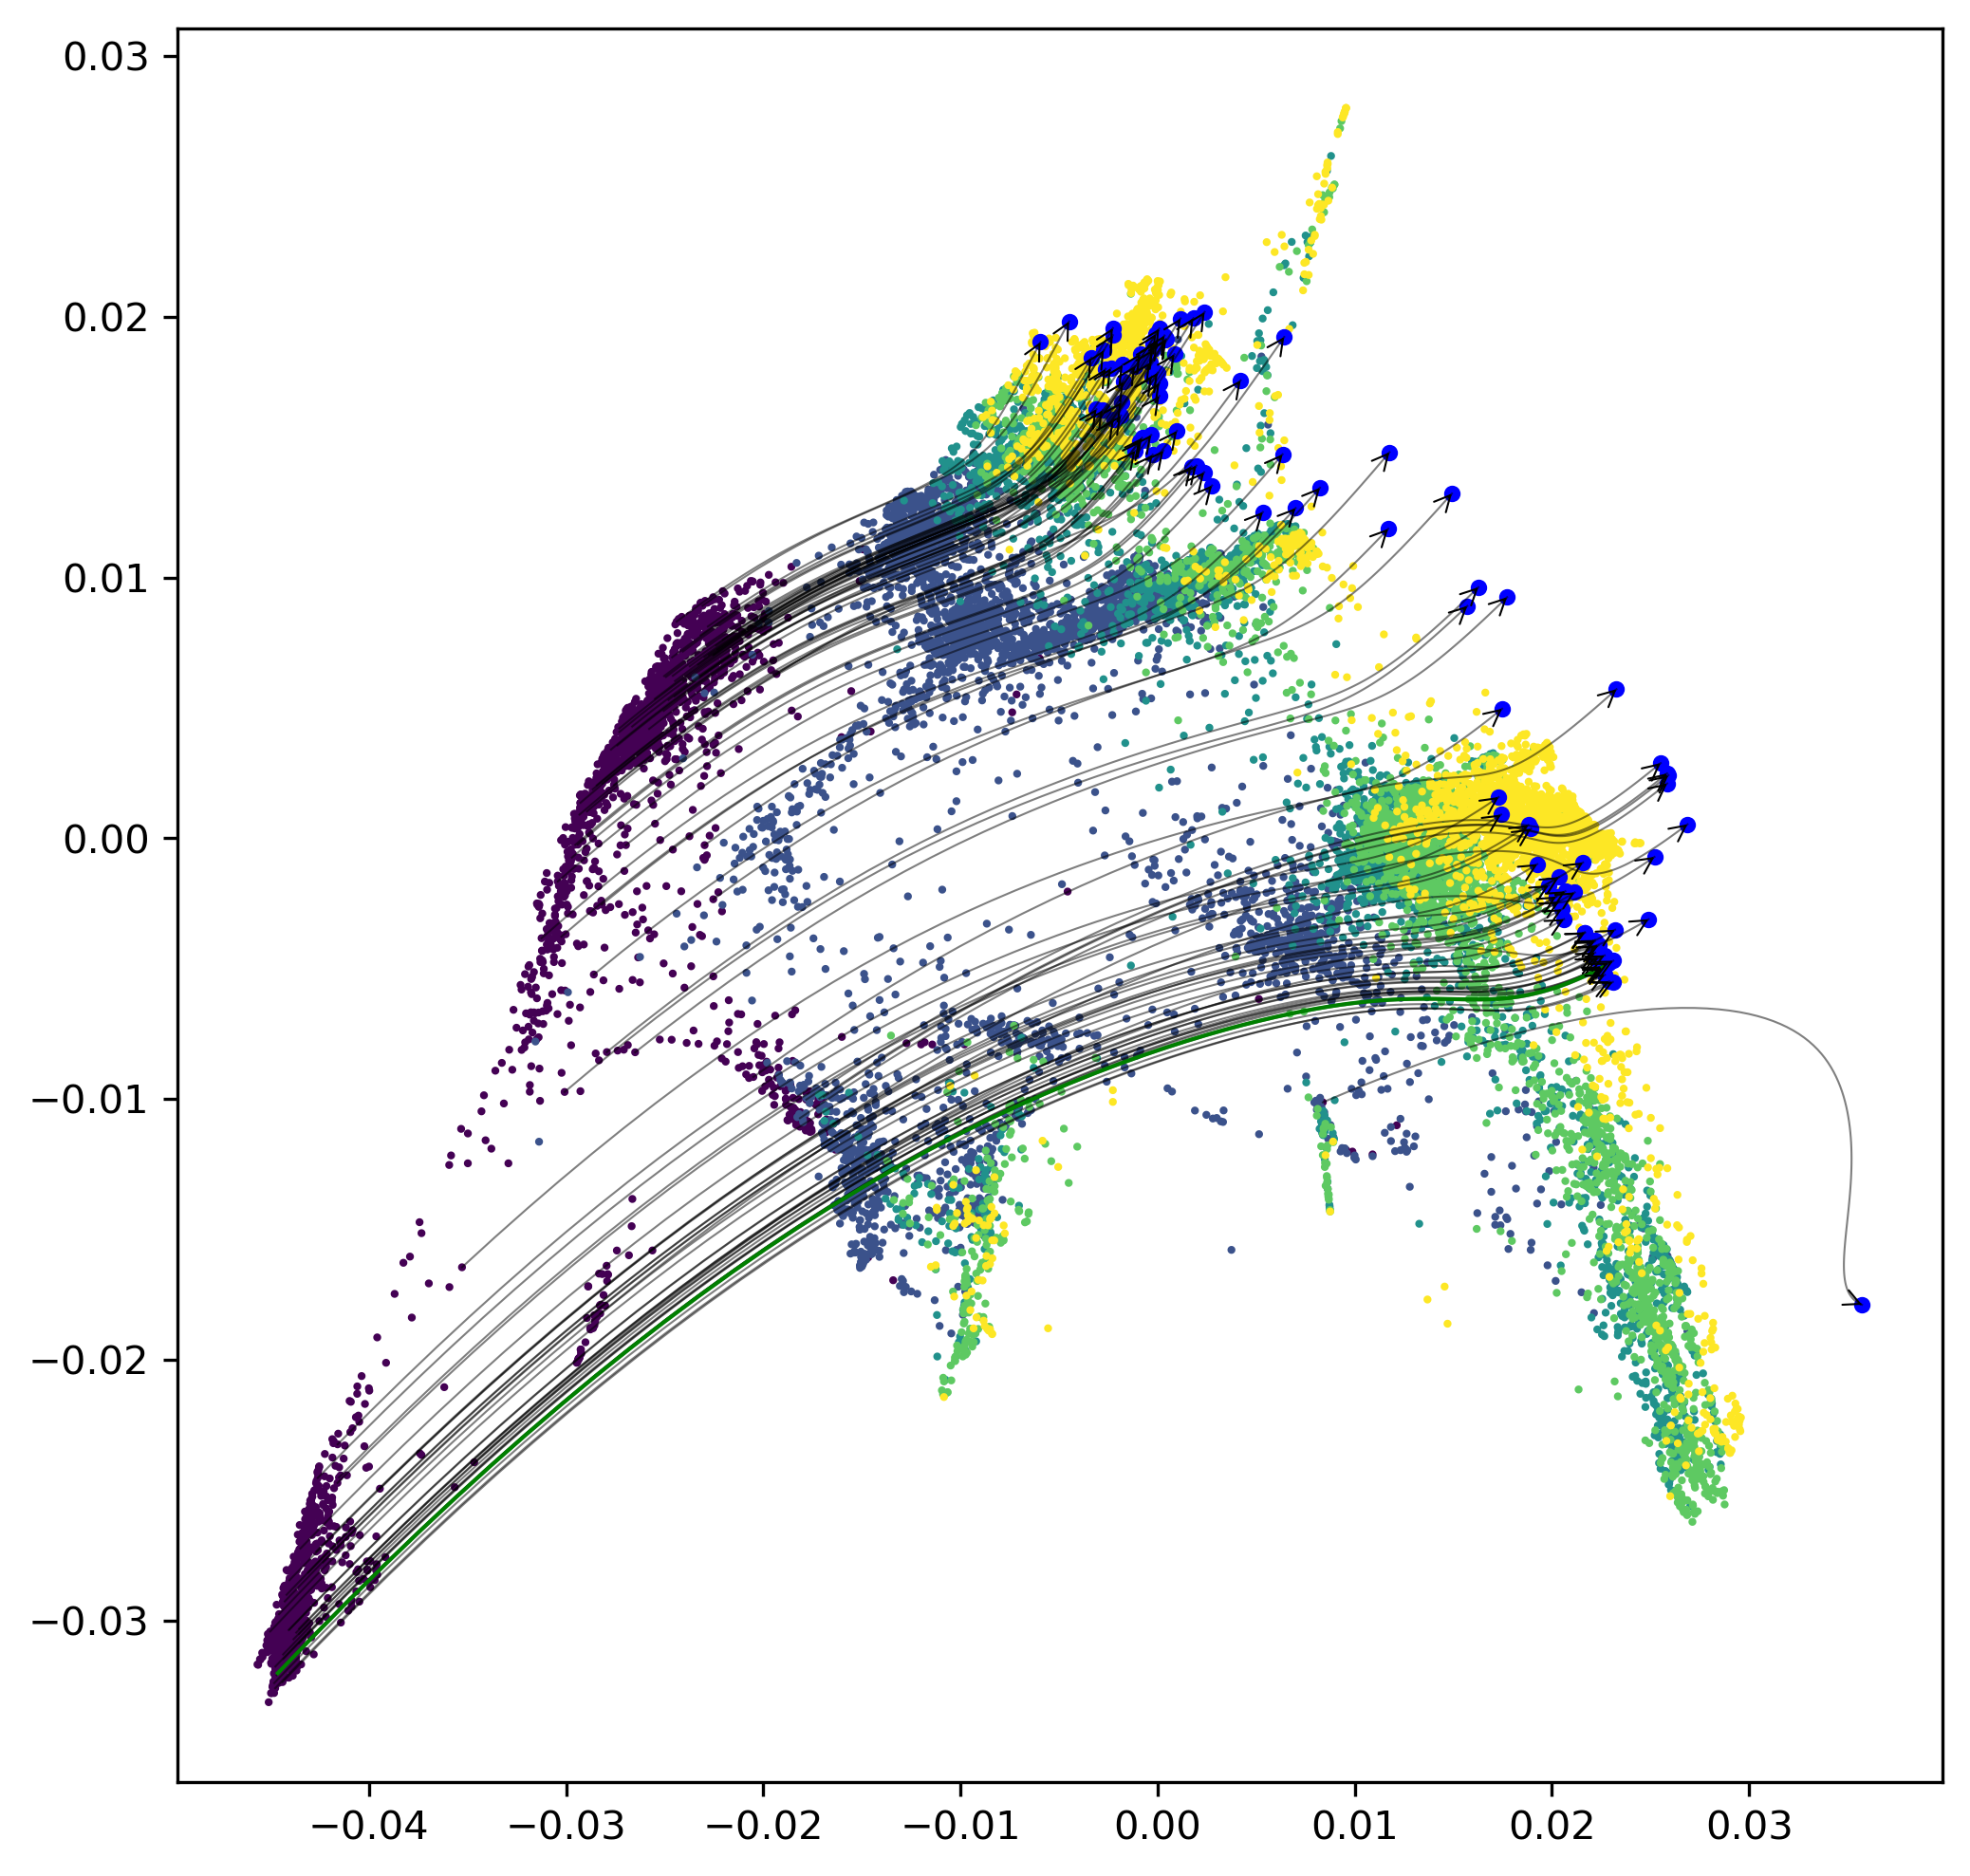

In [6]:
fig = plt.figure(figsize=(8, 8), dpi=300)
plt.scatter(true_data.values[:, 0], true_data.values[:, 1], c=df_samples['samples'].values, cmap='viridis', s=1)

traj_shapes = trajectoriespts.shape
traj_flat = trajectoriespts.reshape(-1, trajectoriespts.shape[-1])
traj_flat = traj_flat.reshape(traj_shapes[0], traj_shapes[1], -1)

trajend = trajectoriespts[-1, :, :]
unatraj = trajectoriespts[:, 0, :]


for i,traj in enumerate(np.transpose(traj_flat, axes=(1,0,2))):
# for i,traj in enumerate(trajvis):
    plt.plot(traj[:, 0], traj[:, 1], alpha=.5, linewidth=.5, color='Black')
    plt.annotate('', xy=(traj[-1, 0], traj[-1, 1]), xytext=(traj[-2, 0], traj[-2, 1]),
                 arrowprops=dict(arrowstyle='->', color='Black', lw=.5, mutation_scale=10))

plt.scatter(trajend[:, 0], trajend[:, 1], c='Blue', s=10)
plt.plot(unatraj[:, 0], unatraj[:, 1], c='Green', linewidth=1)

In [7]:
true_data

d1        d2
0     -0.037337 -0.015149
1     -0.031458 -0.002552
2     -0.024888  0.005286
3     -0.024332  0.005759
4     -0.042807 -0.027289
...         ...       ...
17939  0.014323  0.000104
17940  0.016775 -0.000934
17941  0.022033 -0.000619
17942  0.023366 -0.000482
17943  0.019801  0.000098

[17944 rows x 2 columns]

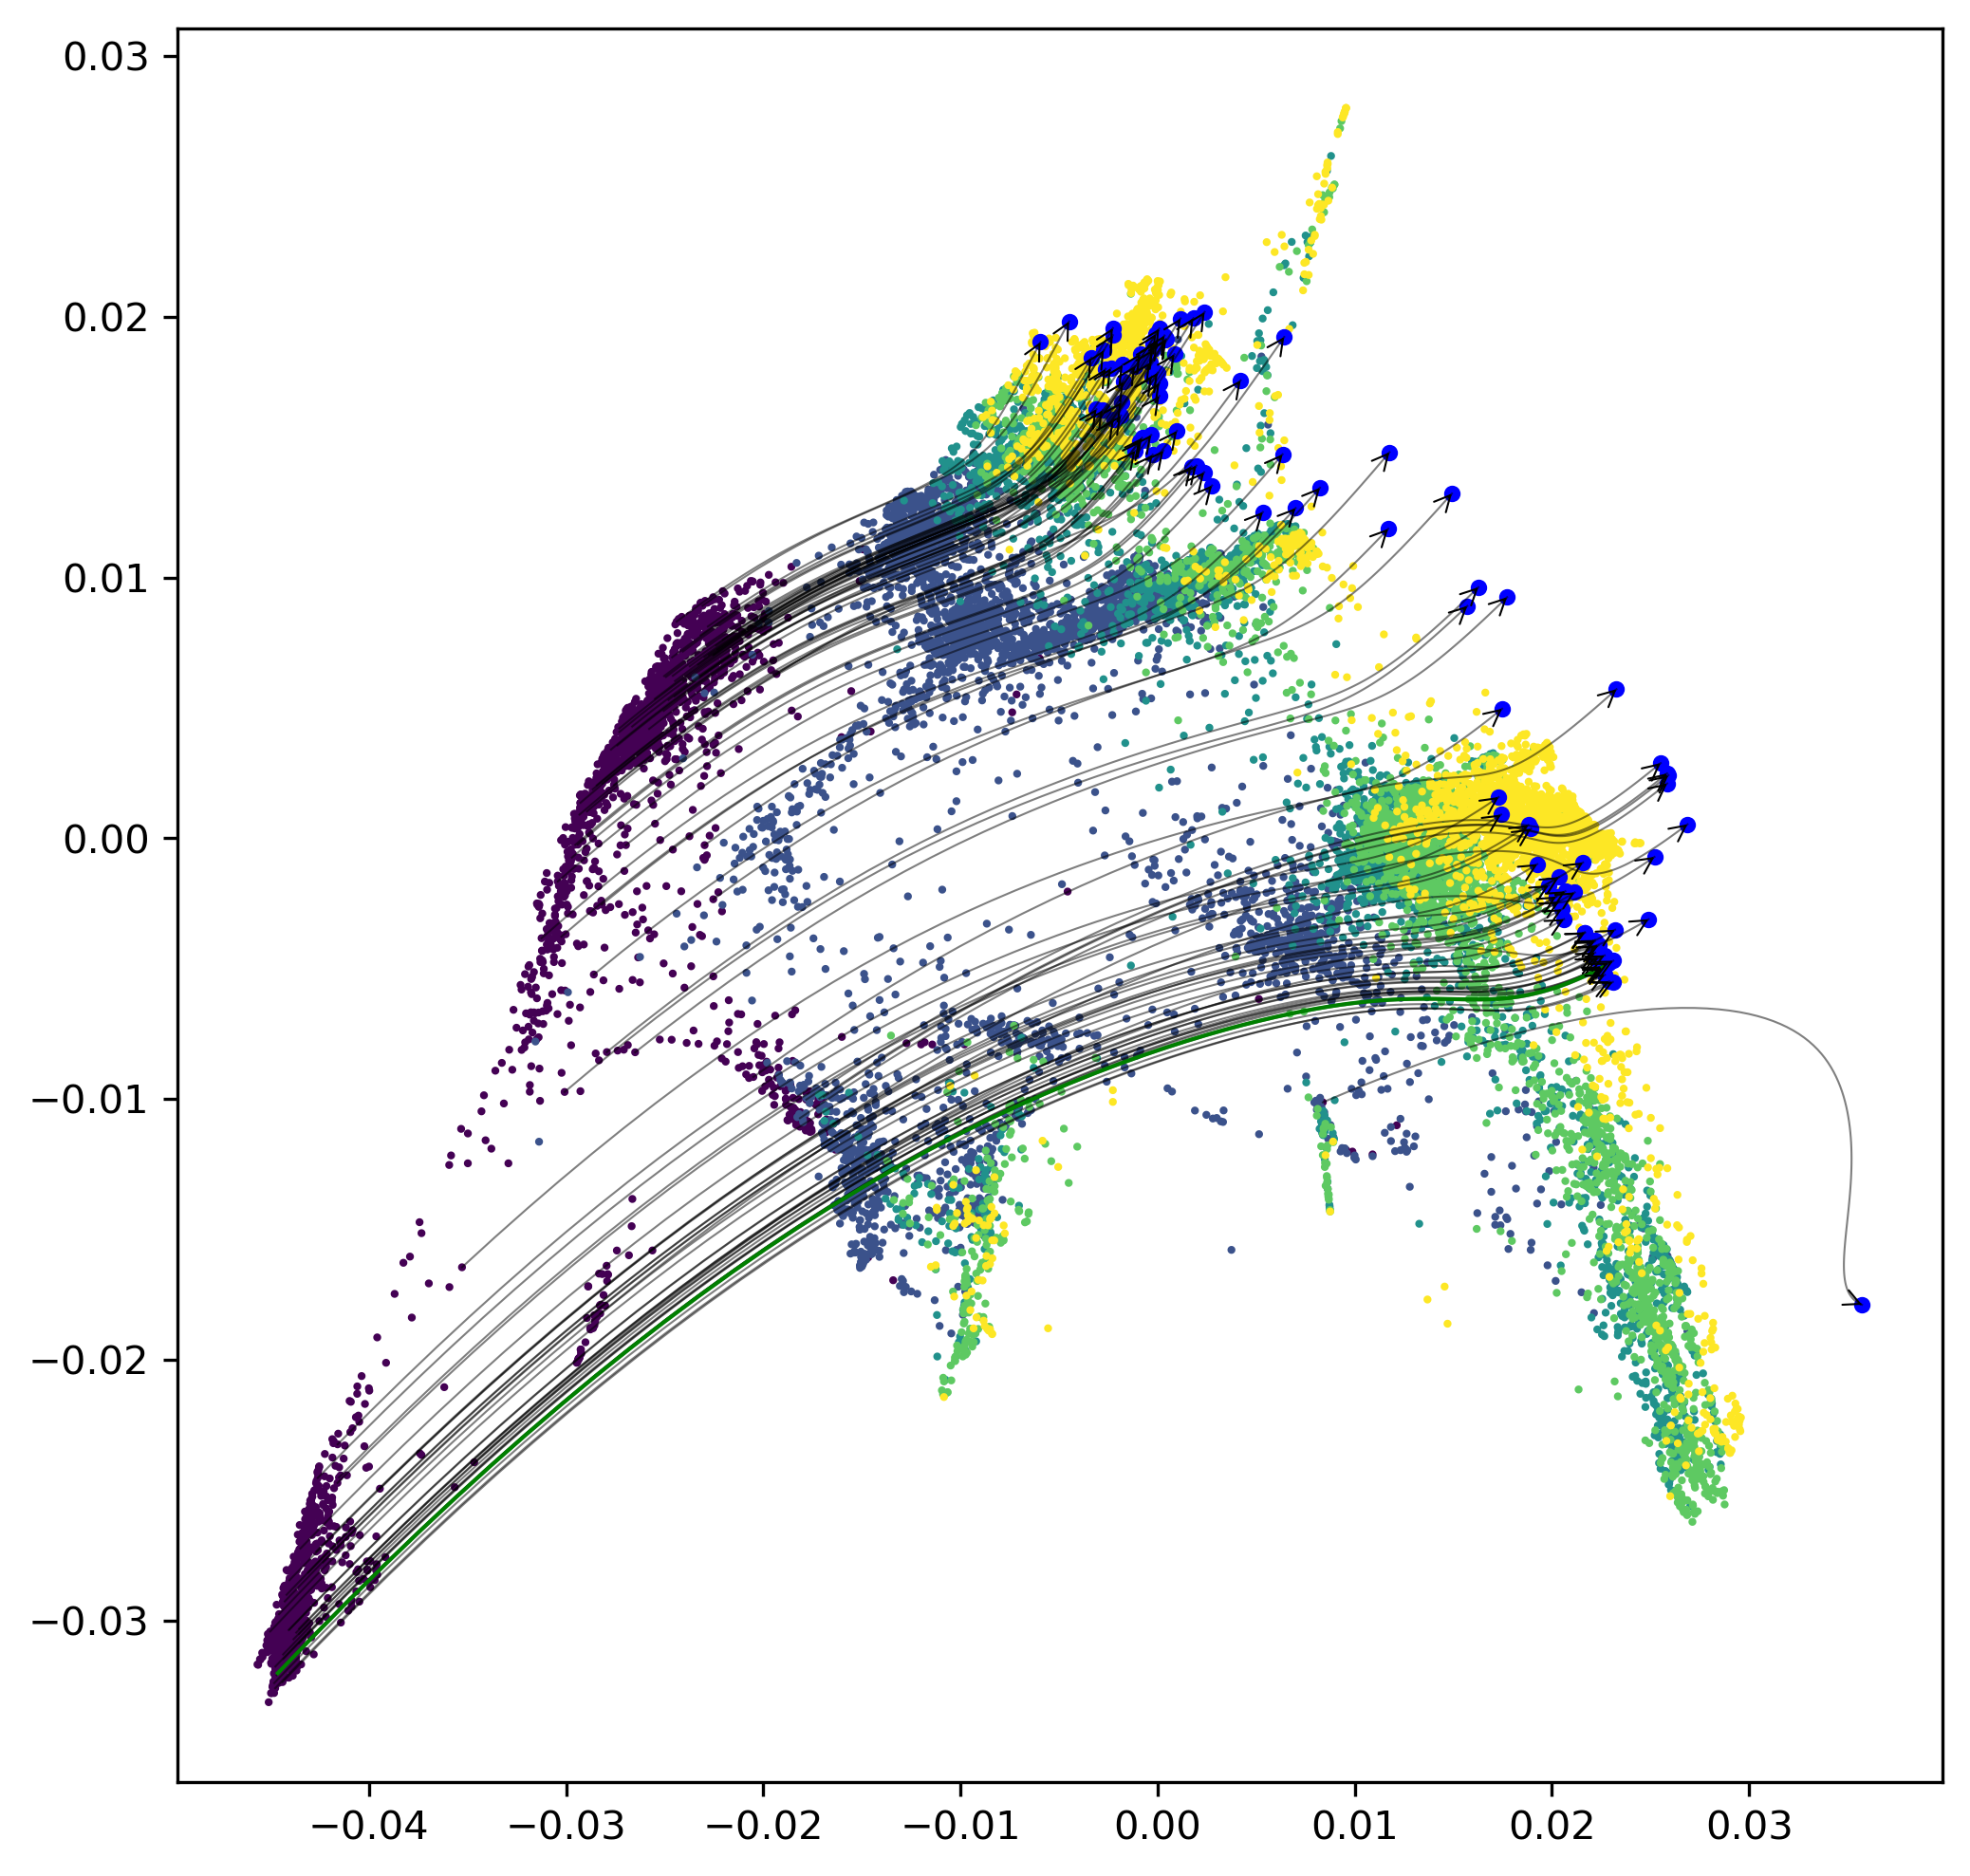

In [10]:
fig = plt.figure(figsize=(8, 8), dpi=300)
plt.scatter(true_data.values[:, 0], true_data.values[:, 1], c=df_samples['samples'].values, cmap='viridis', s=1)

traj_shapes = trajectoriespts.shape
traj_flat = trajectoriespts.reshape(-1, trajectoriespts.shape[-1])
traj_flat = traj_flat.reshape(traj_shapes[0], traj_shapes[1], -1)

trajend = trajectoriespts[-1, :, :]
unatraj = trajectoriespts[:, 0, :]


for i,traj in enumerate(np.transpose(traj_flat, axes=(1,0,2))):
# for i,traj in enumerate(trajvis):
    plt.plot(traj[:, 0], traj[:, 1], alpha=.5, linewidth=.5, color='Black')
    plt.annotate('', xy=(traj[-1, 0], traj[-1, 1]), xytext=(traj[-2, 0], traj[-2, 1]),
                 arrowprops=dict(arrowstyle='->', color='Black', lw=.5, mutation_scale=10))

plt.scatter(trajend[:, 0], trajend[:, 1], c='Blue', s=10)
plt.plot(unatraj[:, 0], unatraj[:, 1], c='Green', linewidth=1)